# Download prerequisite module(s)

In [1]:
from time import time
import matplotlib.pyplot as plt

In [2]:
from osmnx import graph_from_bbox, graph_to_gdfs, plot_graph_route, plot_graph
from osmnx.distance import nearest_nodes, nearest_edges, shortest_path
from osmnx.utils_geo import interpolate_points, sample_points
from shapely.geometry import LineString, GeometryCollection, Point, MultiLineString
from geopandas import GeoDataFrame

In [3]:
import sys
import os
sys.path.append(os.path.abspath("..\\simulator"))

In [4]:
from map.map import sample_points_on_graph

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [5]:
from rider.rider import Rider
from order_restaurant.order_restaurant_simulator import Destination, Order, OrderSimulator
from common.location import LocationEnum

In [67]:
startingTime = 0
getoffTime = 10000
restingTime = 30
location1 = sample_points_on_graph(1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/osmnx/utils_geo.py:45: UserWarning: graph should be undirected to not oversample bidirectional edges
  warnings.warn("graph should be undirected to not oversample bidirectional edges")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)


In [121]:
dest = (13.808980, 100.563353)
dest_point = Point(dest[1], dest[0])
order = Order(0, 0, 0)
dest = Destination(order, dest_point, LocationEnum.RESTAURANT, 0, 0)

In [122]:
#13.914579, 13.738166, 100.661622, 100.484028

In [138]:
rider = Rider(id, location1[0], startingTime , getoffTime, restingTime)

In [139]:
origin = (13.828315, 100.568083)
origin_point = Point(origin[1], origin[0])
rider.location = origin_point

In [140]:
north = max(origin_point.y, dest_point.y)
south = min(origin_point.y, dest_point.y)
east = max(origin_point.x, dest_point.x)
west = min(origin_point.x, dest_point.x)
k = 0.005
zoom_graph = graph_from_bbox(north+k, south-k, east+k, west-k, network_type='drive')

In [141]:
rider.destinations.append(dest)

In [142]:
rider.time_traveling

0

In [143]:
rider_location = list()

In [144]:
for t in range(10000):
    try:
        rider.simulate(t)
        rider_location.append(rider.location)
    except:
        break
    

In [145]:
location1, dest_point

([<POINT (100.543 13.858)>], <POINT (100.563 13.809)>)

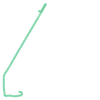

In [146]:
rider.path

In [147]:
rider.path.length

0.033489816950683954

In [148]:
rider.path.length/rider.speed

1606.690535836245

In [149]:
rider.time_traveling

1607

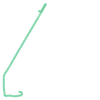

In [150]:
rider.path

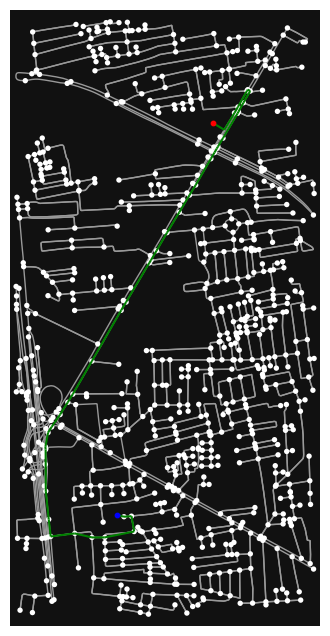

In [151]:
fig, ax = plot_graph(zoom_graph, show=False, close=False)
geometry = [rider.path]#[l for l in  rider_location]
gdf = GeoDataFrame(geometry = geometry)
gdf.plot(ax=ax, markersize = 1, color = "green" , zorder=7)

geometry = [origin_point]
gdf = GeoDataFrame(geometry = geometry)
gdf.plot(ax=ax, markersize = 10, color = "red" , zorder=7)

geometry = [dest_point]
gdf = GeoDataFrame(geometry = geometry)
gdf.plot(ax=ax, markersize = 10, color = "blue" , zorder=7)
plt.show()